## Unsupervised Learning

- All of the previous lectures have been on *supervised learning*
    - Supervised learning is the class of data method for mapping inputs to outputs, like prediction or inference
    - Supervised learning data: $(X_1, Y_1), \dots, (X_n, Y_n)$
    - Goal: Minimize some loss function: $L(f(X), Y)$
    - Typically, we think of $X$ and $Y$ as a joint distribution, $P(X,Y) = P(Y|X) P(X)$
    - In supervised learning, we are more interested $P(Y|X)$ (or $E(Y|X)$) than $P(X)$
- *Unsupervised learning* is a class of data methods for unlabeled data
    - Here, we are interested in learning properties of $P(X)$ without using labels, $Y$
    - examples: clustering, anomaly detection, latent variable analysis 

### Dimensionality Reduction

- Methods for reducing the number of variables in a dataset

##### Principle Components Analysis (PCA)

![PCA Image](https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)

- PCA tries to explain variance in the data using linear combinations of the variables
- [Developed in 1901 by Pearson](https://en.wikipedia.org/wiki/Principal_component_analysis)
- PCA can be thought of as fitting a p-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component
- If some axis of the ellipsoid is small, then the variance along that axis is also small

![PCA ellipsoid](https://cdn.askpython.com/wp-content/uploads/2020/10/Fitting-an-ellipse-to-data.jpg)

- Assume $X$ is an $n\times p$ *standardized* data matrix
    - standardized data: for each column, $X_j$ of $X$, replace with $\frac{X_j-\bar X_j}{\widehat{\text{var}(X_j)}}$
- First principal component: find unit-vector (direction), $w$, that best fits the data
    - find the directions within the data with the greatest variance
- Optimization: $$w^* = \arg\max_{\|w\|=1} \widehat{\text{var}}(Xw) = \arg\max_{\|w\|=1} \|Xw\| = \arg\max_w \frac{w^TX^TXw}{w^Tw}$$ where $\|w\|=\sqrt{\sum_i w_i^2}$ is the Euclidean norm
- Recall that $X^TX$ is the empirical covariance matrix
- Eigenvectors of $X^TX$ solve the problem
    - Lagrangian: $$\mathcal{L}(w,\lambda)=w^TX^TXw-\lambda w^Tw$$
    - Gradient with respect to $w$: $$\nabla_w\mathcal{L}=2X^TXw-2\lambda w=0$$
    - Then $X^TXw=\lambda w$, so principal components are eigenvectors of $X^TX$
    - The first principal component has largest corresponding eigenvalue, $\lambda$
    - The second principal component has second largest, etc
- Notice that there will be $p$ total principal components
    - it is common to use the first $k$ principal components with the that explain the majority of the variance, above some pre-set cutoff
- If $w_1, w_2, \dots, w_k$ are the first $k<p$ components, we can regress an outcome on $Xw_1, \dots, Xw_k$ in place of $X$
- All principal component vectors, $w_1, \dots, w_p$ are mutually orthogonal (zero dot product or forming right angles)
- PCA is an old method that is still sometimes used but it has inspired many other methods

**Iris Data**

- 150 rows, 4 features
- Label (target): 0,1,2 (flower type)
- We only label for color coding but won't use in analysis
- Below is are scatter and density plots

number of rows, number of columns: (150, 4)


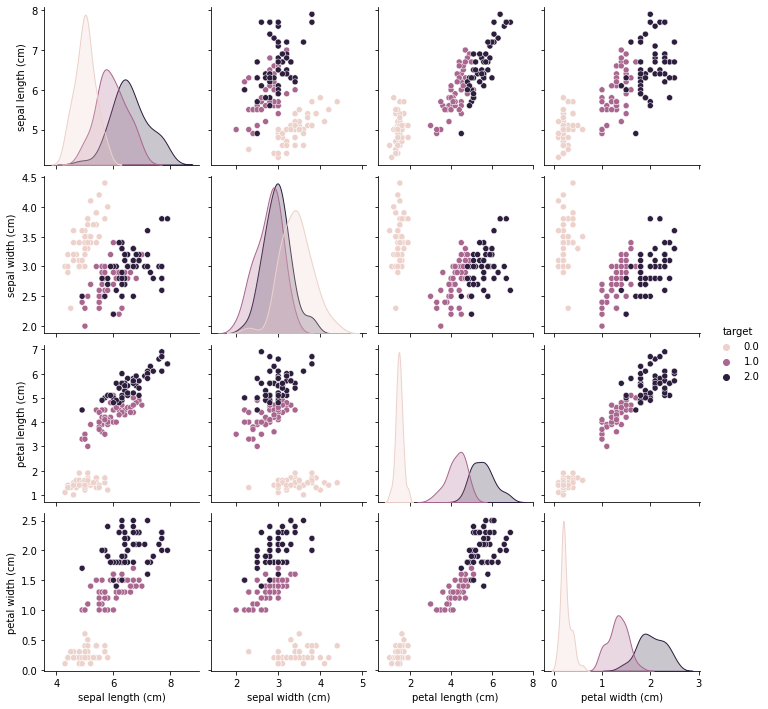

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
iris = load_iris()
label_data = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target'])
data = iris['data']

print(f'number of rows, number of columns: {data.shape}')

sns.pairplot(label_data, hue="target");

Below: Using PCA to explain variance in data with `sklearn`

In [2]:
pca = PCA()
pca.fit(data)
print(f'Variance explained in each component: \
{pca.explained_variance_ratio_}')
print(f'lambda values: {pca.singular_values_}')
print(f'All components: {pca.components_}')

Variance explained in each component: [0.92461872 0.05306648 0.01710261 0.00521218]
lambda values: [25.09996044  6.01314738  3.41368064  1.88452351]
All components: [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


- Choosing the top two components
- Jointly they explain ~98% of the variance in features

In [3]:
pca = PCA(n_components=2)
pca.fit(data)
pca_iris = pca.fit_transform(data)
pca_iris[0:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

Below: Labeled scatter plot of first two principal components

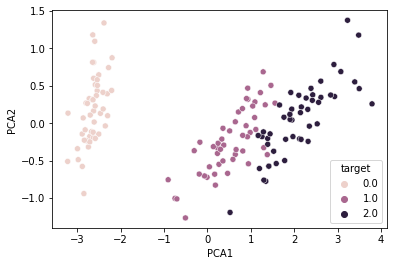

In [4]:
pca_label = pd.DataFrame(
    data= np.c_[pca_iris, iris['target']],
    columns= ['PCA1', 'PCA2'] + ['target'])
sns.scatterplot(data=pca_label, x='PCA1', y='PCA2', hue='target');

[**Handwritten Digit Data**](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)
![digits image](http://scipy-lectures.org/_images/sphx_glr_plot_digits_simple_classif_001.png)

- 250 samples from 44 writers (according to UCI data repo)
- 1797 8x8 images transformed into feature vectors of length 64
- There is variation in writing style, thickness, and orientation

In [5]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
print(f'Dimensions of X: {X.shape}')
print(f'Dimensions of y: {y.shape}')
print('Looking at top left corner of data:')
X[0:5,0:10]

Dimensions of X: (1797, 64)
Dimensions of y: (1797,)
Looking at top left corner of data:


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8.],
       [ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
pca = PCA()
pca.fit(X)
print(f'Variance explained in first 10 components:\n\
{np.round(pca.explained_variance_ratio_[0:10], 4)}')
print(f'Variances of first 10: \n\
{np.round(pca.singular_values_[0:10], 2)}')

Variance explained in first 10 components:
[0.1489 0.1362 0.1179 0.0841 0.0578 0.0492 0.0432 0.0366 0.0335 0.0308]
Variances of first 10: 
[567.01 542.25 504.63 426.12 353.34 325.82 305.26 281.16 269.07 257.82]


- How well do the first 10 principal components predict the digit compared to the entire data?
- Below we'll use random forest on the full data and on the PCA transformed data
- Rather than using cross (or held out) validation, we will use out of bag sample accuracy

In [7]:
pca10 = PCA(n_components=10)
pca10.fit(X)
X_pca10 = pca.fit_transform(X)

from sklearn.ensemble import RandomForestClassifier
rf_full = RandomForestClassifier(max_depth=2, random_state=0, 
                                 oob_score=True)
rf_full.fit(X, y)
print(f'Out of bag accuracy for full data: {rf_full.oob_score_}')

rf_pca = RandomForestClassifier(max_depth=2, random_state=0,
                               oob_score=True)
rf_pca.fit(X_pca10, y)
print(f'Out of bag accuracy PCA transformed data: \
{rf_pca.oob_score_}')

Out of bag accuracy for full data: 0.7835281023928771
Out of bag accuracy PCA transformed data: 0.7857540345019477


#### Independent Componenets Analysis (ICA)

- Image below: left panel is PCA; right panel is ICA
![ICA image](https://media.springernature.com/lw785/springer-static/image/prt%3A978-0-387-73003-5%2F9/MediaObjects/978-0-387-73003-5_9_Part_Fig1-305_HTML.jpg)

- ICA attempts to factor a random matrix $X=AS$ where $X$ is the $n\times p$ data matrix
- $S$ is an $n\times p$ matrix called the latent source matrix
- $A$ is a $p\times p$ matrix called the mixing matrix
- Goal: Estimate $A$ so that the columns of $S$ are *mutually independent*
- Interestingly, this is only possible for non-Gaussian distributions
- Cocktail Party Example: Assume that there are $p$ mircophones placed around a room with $p$ people speaking at the same time
    - Goal: Use signal from each mircophone to distinguish each speaker

![cocktail party problem](https://media.geeksforgeeks.org/wp-content/uploads/20190521012201/ica.jpg)
    
- Without loss of generality, we can assume that $E(S)=0$ and $\text{Cov}(S)=I_p$ (this covariance assume uncorrelated, not independent!)
- Then $$\text{Cov}(X) = \text{Cov}(AS) = AA^T$$
- If $R$ is any orthogonal $p\times p$ matrix ($R^{-1}=R^T$), then $$X=AS=AR^TRS=(AR^T)(RS)$$
- And, $\text{Cov}(RS) = RI_pR^T = I_p$, because correlation is not unique under rotations
- For Gaussian distribution, it is perfectly characterized by its first and second moments
    - For Gaussian distributions uncorrelated implied independent, which is why we assume non-Gaussian
- ICA uses third and higher moments to estimate $A$
    - In fact, it attempts to maximize divergence from Gaussianity
- ICA can be used for *causal discovery*
    - Causal discovery methods estimate a causal Bayesian network from data
    - Assume $X \rightarrow Y$ as $Y = bX+\epsilon$ where $X$ and $\epsilon$ are independent random variables, and $E[\epsilon]=0$ (zero-mean noise)
    - We only observe $X$ and $Y$ in the data but $X$ and $\epsilon$ are the independent components
    - If $X$ and $\epsilon$ are non-Gaussian, we can use ICA to determine causal ordering
    
![ICA causal](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs40535-016-0018-x/MediaObjects/40535_2016_18_Fig3_HTML.gif)
    
**Optimization**

- There is a [lot of literature](https://www.wiley.com/en-us/Independent+Component+Analysis-p-9780471405405) on ways to optimize ICA
- Using entropy and mutual information:
    - Recall entropy $H(Y) = -\int p(y)\log p(y)dy$ where $Y\sim p$
    - If $Y=(Y_1,\dots, Y_p)$, then the multivariate mutual information between all variables is $$I(Y)=\sum_{j=1}^p H(Y_j)-H(Y)$$
    - Recall that if $I(Y)=0$ then all $Y_j$ are mutually independent
    - If $\text{Cov}(X)=I_p$ and $W$ is a $p\times p$ orthogonal matrix, we can minimize $$W^*= \arg\min_W I(WX) = 
    \arg\min_W \sum_{j=1}^p H(w_j^TX)-H(X)$$ where $w_j$ is the $j$th row of $W$
    - Then use $A^*=(W^*)^{-1}$
    - Unfortunately, estimating entropy can be challenging and sometimes computationally expensive
- FastICA:
    - Interestingly, minimizing $I(WX)$ is equivalent to maximizing the departure of each $w_j^TX$ from Gaussianity
    - *Negentropy* $J(Y_j)=H(Y_j)-H(Z_j)$ where $Z_j$ is a Gaussian random variable with the same variance as $Y_j$ (measure departure from Gaussianity)
    - FastICA approximates negentropy with $$J(w_j^T)\approx \left(E[G(w_j^TX)]-E[G(w_j^TZ)]\right)$$ where $G(y)=\frac{1}{a} \log \cosh y$ for $a\in (1,2)$
    
ICA notes based on these [slides](http://statweb.stanford.edu/~tibs/sta306bfiles/ica.pdf)

- The code below uses `FastICA` to transform the the data
- Again, we use random forest to see how well the transformed data predicts the label
- Note: it can be difficult to optimize ICA

In [8]:
from sklearn.decomposition import FastICA
transformer10 = FastICA(n_components=10, random_state=0)
X_ica10 = transformer10.fit_transform(X)

rf_ica = RandomForestClassifier(max_depth=2, random_state=0, 
                                 oob_score=True)
rf_ica.fit(X_ica10, y)
print(f'Out of bag accuracy for ICA transformed data: \
{rf_full.oob_score_}')

Out of bag accuracy for ICA transformed data: 0.7835281023928771


### Cluster Analysis (clustering)

- Clustering attempts to group together observations that are close to each other
- This can take different forms
- It might be that data points are grouped around central points
![clustering image](https://developers.google.com/machine-learning/clustering/images/DistributionClustering.svg)

- In other cases, groups are formed by proximity to other points in the group, like a chain
![other clustering image](https://hpccsystems.com/sites/default/files/inline-images/Capture.PNG)

##### $K$-means

- Goal: group points using proximity to $K$ unknown cluster centers
- This approach would work better for data in the top image, but not the bottom image
- Assume $X_1,\dots,X_n$ is a sample where $X_i\in\mathbb{R}^d$ for $i=1,\dots,n$
- Let $C=\{c_1,\dots,c_K\}, c_k\in\mathbb{R}^d,$ be variable point that we will use to find cluster centers
- [Lloyd's algorithm](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm) has two steps:
    1. Assign a cluster: for each point, $i=1,\dots,n$, find the closest $c_k\in C$, $$z_i = \arg\min_{1\leq k\leq K} \|X_i-c_k\|$$
    2. Recenter cluster: update each $c_k$ with the new group, $$c_k\leftarrow \frac{1}{n_k}\sum_{i:z_i=k} X_i$$ $n_k = \#\{i: z_i=k\}$
    - We can initialize this algorithm with $K$ random points in $\mathbb{R}^d$
    - These two steps are repeated until $C$, the cluster center points, converge (until they stop moving between steps)
- Optimization: $$\frac{1}{n}\sum_{i=1}^n \min_{1\leq k\leq K} \|X_i-c_{z_i}\|^2$$
- Once the cluster centers are set, they create a *Voronoi Tessellation*:
![Voronoi Tessellation](https://e7.pngegg.com/pngimages/985/267/png-clipart-voronoi-diagram-k-nearest-neighbors-algorithm-point-statistics-nearest-neighbor-search-others-miscellaneous-blue.png)
- Below: we run this algorithm on Iris PCA-transformed data

Number of misclassifications:


True     133
False     17
Name: Cluster, dtype: int64

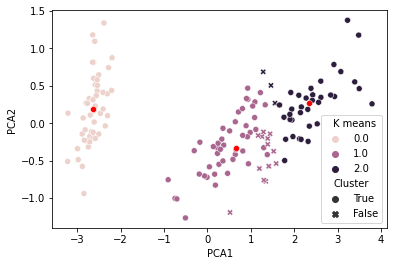

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_iris)

# switching labels to match
def switch_1_2(x):
    if x==0.0:
        return 0.0
    if x==1.0:
        return 2.0
    if x==2.0:
        return 1.0
kmeans_labs = np.vectorize(switch_1_2)(kmeans.labels_)

pca_label = pd.DataFrame(
    data= np.c_[pca_iris, iris['target'], kmeans_labs],
    columns= ['PCA1', 'PCA2', 'True Label', 'K means'])
def class_error(row):
    return row['True Label'] == row['K means']
pca_label['Cluster'] = pca_label.apply(class_error, axis=1)

sns.scatterplot(data=pca_label, x='PCA1', y='PCA2', hue='K means',
               style='Cluster', style_order=[True,False]);
centers = pd.DataFrame(
    kmeans.cluster_centers_, columns=['PCA1', 'PCA2'])
sns.scatterplot(data=centers, x='PCA1', y='PCA2', color='red');
print(f'Number of misclassifications:')
pca_label.Cluster.value_counts()

- Above: Showing K means groups with error as 'x' point markers
- The red points show the cluster centers
- This model does not account for different sized cluster
![mouse cluster](https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/450px-ClusterAnalysis_Mouse.svg.png)

#### Gaussian Mixture Model and EM Clustering

- Another way to think about clustering is with a *Gaussian [mixture model](https://en.wikipedia.org/wiki/Mixture_model)* (GMM)
![GMM](https://www.researchgate.net/profile/Denis-Pallez/publication/224105715/figure/fig1/AS:302870185431040@1449221287121/3D-view-of-a-4D-Gaussian-Mixture-Model-used-in-our-experiments.png)
    - Assume that our data points are each generated from different Gaussian distributions
    - All we see is the location, not the *latent* variable which determines which distribution each sample was generated from
    - $x_1, \dots, x_n$ is a random sample
    - Each $x_i$ is associated with a latent random variable, $z_i$, that indicates the cluster/distribution of $x_i$
    - Density of $z$ is multinomial with probabilities, $\pi_1,\dots, \pi_K$
    - Let $(\mu_k, \Sigma_k)$ for $j=1,\dots,K$ be the mean vector and covariance matrix for $K$ multivariate Gaussian distributions
    - In a Gaussian mixture model, each data point is generated from one of the $K$ multivariate Gaussian distribution,
    $$x_i\sim\text{Gaussian}(\mu_k,\Sigma_k)$$ with probability $\pi_k$
    - For $i=1,\dots,n$, if $z_i=k$ then $$x_i\sim\text{Gaussian}(\mu_k,\Sigma_k) := p(x_i|z_i=k)$$
    - Joint distribution of $x$ and $z$ $$p(x,z) = \prod_{k=1}^K \pi_k^{I(z=k)} \cdot \left[\text{Gaussian}(x; \mu_k; \Sigma_k)\right]^{I(z=k)}$$
    - Marginal distribution $x$ (summing over the values of $z$) $$p(x) = \sum_{k=1}^K \pi_k \cdot \text{Gaussian}(x;\mu_k,\Sigma_k)$$
    - Each point is generated from one of these Gaussian distributions but we won't know which

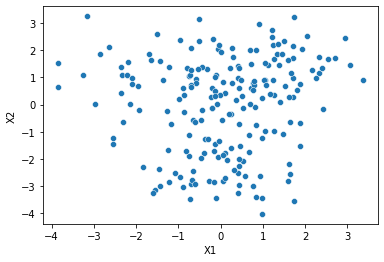

In [10]:
dist_probs = [0.2, 0.3, 0.5]
data = []
samp_size = 200

for _ in range(samp_size):
    k = np.random.choice(np.arange(0, 3), p=dist_probs)
    if k==0:
        obs = np.random.multivariate_normal(
            [-2,1], [[1,0.2], [0.2,1]]).tolist()
    elif k==1:
        obs = np.random.multivariate_normal(
            [0,-2], [[1,0], [0,1]]).tolist()
    else:
        obs = np.random.multivariate_normal(
            [1,1], [[1,0.3], [0.3,1]]).tolist()
    obs.append(k)
    data.append(tuple(obs))
df = pd.DataFrame(data, columns=['X1', 'X2', 'label'])
sns.scatterplot(x='X1', y='X2', data=df);

Below: color by label

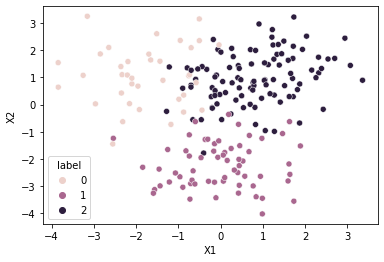

In [11]:
sns.scatterplot(x='X1', y='X2', data=df, hue='label');

**EM Algorithm**

- EM stands for Expectation Maximization


- We assume that the sample is generated from a Gaussian mixture model


- Using the Gaussian mixture likelihood, cycle between 
    - Imputing the expected cluster (probability) of each point, $i=1,\dots,n$
    - Recalculate GMM parameters, $\pi_k,\mu_k, \Sigma_k$ for $k=1,\dots,K$, to maximize the likelihood
    
- Cosma Shalizi: "one man's vicious circle is another man's successive approximation procedure"


- Sample marginal likelihood of $x$: $$L(\pi, \mu, \Sigma) = \prod_{i=1}^n\sum_{k=1}^K \pi_k \cdot \text{Gaussian}(x_i;\mu_k,\Sigma_k)$$ where $\pi=(\pi_1,\dots,\pi_K), \mu=(\mu_1,\dots,\mu_K), \Sigma=(\Sigma_1,\dots,\Sigma_K)$


- **E step**: Calculate expected value of cluster assignments for each point, $x_i$, using the values of $\pi,\mu,\Sigma$ from last step, $$p^\text{new}(z_i=k) \leftarrow E[z_i=k|\pi,\mu,\Sigma]$$
    - This expected value is really $P(z_i=k)$ (expected value of an indicator function is a probability)
    - Calculate these probabilities as $$p^\text{new}(z_i=k)\leftarrow \frac{\pi_k^\text{old} \cdot\text{Gaussian}(x_i;\mu_k^\text{old},\Sigma_k^\text{old})}{\sum_{j=1}^K \pi_k^\text{old} \cdot \text{Gaussian}(x_i;\mu_j^\text{old},\Sigma_j^\text{old})}$$
    
    - To make the notation in the next step clearer, let $$r_i(k) \leftarrow p^\text{new}(z_i=k)$$
    
    - For each point, we have a vector of assignment probabilities $$[r_i(1),\dots, r_i(K)]$$
    - We can think about this vector as the *responsibility* that the GMM takes for explaining observation $i$
    
    
    
- **M step**: Calculate maximum likelihood estimates for all parameters, $\pi,\mu, \Sigma$ using the expected cluster assignments,  $[r_i(1),\dots, r_i(K)]$
    - Goal: optimize likelihood of joint distribution $p(x,z)$ $$\pi^\text{new},\mu^\text{new},\Sigma^\text{new} \leftarrow \arg\max_{\pi,\mu,\Sigma} E\left[\log\left( \prod_{i=1}^n p(x_i, z_i) \right)\right]$$
    - This can be hard because $L$ is not convex with respect to $\pi,\mu,\Sigma$
    - Conditional density of $x_i$ given $z_i$: $$p(x_i|z_i) = \prod_{k=1}^K \left[\text{Gaussian}(x_i; \mu_k, \Sigma_k)\right]^{I(z_i=k)}$$
    - Density of $z_i$: $$p(z_i) = \prod_{k=1}^K \pi_k^{I(z_i=k)}$$
    - Likelihood:
    $$
    \begin{align*}
    &E\left[\log\left( \prod_{i=1}^n p(x_i, z_i) \right)\right] \\
    &= E\left[\log\left( \prod_{i=1}^n p(z_i) p(x_i| z_i) \right)\right] \\
    &= E\left[\log\left( \prod_{i=1}^n \prod_{k=1}^K \pi_k^{I(z_i=k)} \cdot \left[\text{Gaussian}(x_i; \mu_k, \Sigma_k)\right]^{I(z_i=k)} \right)\right] \\
    &= E\left[\sum_{i=1}^n \sum_{k=1}^K I(z_i=k)\log \pi_k + I(z_i=k) \log\left[\text{Gaussian}(x_i; \mu_k, \Sigma_k)\right] \right] \\
    &= \sum_{i=1}^n \sum_{k=1}^K r_i(k)\log \pi_k + r_i(k) \log\left[\text{Gaussian}(x_i; \mu_k, \Sigma_k)\right] \\
    \end{align*}
    $$
    - This can be solved using Lagrange multiplier with the constraint that $\sum_{k=1}^K\pi_k =1$
    $$\mathcal{L} = \sum_{i=1}^n \sum_{k=1}^K r_i(k)\log \pi_k + r_i(k) \log\left[\text{Gaussian}(x_i; \mu_k, \Sigma_k)\right] - \lambda\left(\sum_{k=1}^K\pi_k -1\right)$$
    - Differentiate with respect to parameters, $\pi,\mu,\Sigma$ and $\lambda$ then set equal to zero
    - Solutions:
    $$
    \begin{align*}
    n_k^\text{new} &\leftarrow \sum_{i=1}^n r_i(k) \\
    \pi_k^\text{new} &\leftarrow \frac{n_k^\text{new}}{n} \\
    \mu_k^\text{new} &\leftarrow \frac{1}{n_k^\text{new}}\sum_{i=1}^n r_i(k)x_i \\
    \Sigma_k^\text{new} &\leftarrow \frac{1}{n_k} \sum_{i=1}^n r_i(k)(x_i-\mu_k^\text{new})(x_i-\mu_k^\text{new})^T
    \end{align*}
    $$


- The algorithm must begin initialized with parameters, $\pi,\mu, \Sigma$
- The algorithm cycles through these steps until the parameters converge

Number of misclassifications:


True     147
False      3
Name: Cluster, dtype: int64

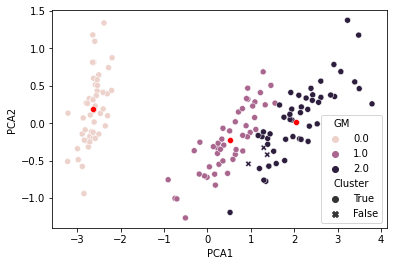

In [12]:
from sklearn.mixture import GaussianMixture

# n_components here is number of clusters
gm = GaussianMixture(n_components=3, random_state=0).fit(pca_iris)

# switching cluster labels
gm_labs = np.vectorize(switch_1_2)(gm.fit_predict(pca_iris))

pca_label_gm = pd.DataFrame(
    data= np.c_[pca_iris, iris['target'], gm_labs],
    columns= ['PCA1', 'PCA2', 'True Label', 'GM'])
def class_error(row):
    return row['True Label'] == row['GM']
pca_label_gm['Cluster'] = pca_label_gm.apply(class_error, axis=1)

sns.scatterplot(data=pca_label_gm, x='PCA1', y='PCA2', hue='GM',
               style='Cluster', style_order=[True,False]);
centers = pd.DataFrame(
    gm.means_, columns=['PCA1', 'PCA2'])
sns.scatterplot(data=centers, x='PCA1', y='PCA2', color='red');
print(f'Number of misclassifications:')
pca_label_gm.Cluster.value_counts()